IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      92.0 -0.002738   0.007090   -0.253669   0.084153          0.0   
1      50.0  0.002550   0.007327   -0.373862   0.085527          0.0   
2      17.0 -0.001267   0.011375    2.874801   0.106517         59.0   
3      50.0 -0.069582   0.010417    0.922791   0.123420          0.0   
4      33.0 -0.063517   0.012010    0.367764   0.126542          0.0   
...     ...       ...        ...         ...        ...          ...   
1344    3.0 -0.014019   0.017944    0.179399   0.134498         68.0   
1345   79.0 -0.050922   0.016235   -0.502459   0.137079        115.0   
1346   54.0 -0.035514   0.020145   -0.212831   0.146138        114.0   
1347   38.0 -0.042647   0.016697   -0.507006   0.135915        118.0   
1348   24.0 -0.062624   0.012250    0.306105   0.127038          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            86.0    5.512396    1.763770  0.012334  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.002738   0.007090   -0.253669   0.084153          0.0         86.0   
1     0.002550   0.007327   -0.373862   0.085527          0.0        112.0   
2    -0.001267   0.011375    2.874801   0.106517         59.0         58.0   
3    -0.069582   0.010417    0.922791   0.123420          0.0        121.0   
4    -0.063517   0.012010    0.367764   0.126542          0.0         76.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.014019   0.017944    0.179399   0.134498         68.0         69.0   
1345 -0.050922   0.016235   -0.502459   0.137079        115.0        141.0   
1346 -0.035514   0.020145   -0.212831   0.146138        114.0        113.0   
1347 -0.042647   0.016697   -0.507006   0.135915        118.0         93.0   
1348 -0.062624   0.012250    0.306105   0.127038          0.0         76.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.058491   0.005909    0.046749   0.096512          0.0         98.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   12.599968    2.221298  0.032053   0.003718  ...      14509.379225   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.474568          0.587177          -1.290655          3.557838   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               109.0               108.0          32.725079   

     amp2(Curr(ESC_5))  Guasto  
340           6.546383       0  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.002738   0.007090   -0.253669   0.084153          0.0         86.0   
1     0.002550   0.007327   -0.373862   0.085527          0.0        112.0   
2    -0.001267   0.011375    2.874801   0.106517         59.0         58.0   
3    -0.069582   0.010417    0.922791   0.123420          0.0        121.0   
4    -0.063517   0.012010    0.367764   0.126542          0.0         76.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.014019   0.017944    0.179399   0.134498         68.0         69.0   
1345 -0.050922   0.016235   -0.502459   0.137079        115.0        141.0   
1346 -0.035514   0.020145   -0.212831   0.146138        114.0        113.0   
1347 -0.042647   0.016697   -0.507006   0.135915        118.0         93.0   
1348 -0.062624   0.012250    0.306105   0.127038          0.0         76.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.002738   0.007090   -0.253669   0.084153     0.000000    86.000000   
1     0.002550   0.007327   -0.373862   0.085527     0.000000   112.000000   
2    -0.001267   0.011375    2.874801   0.106517    59.000000    58.000000   
3    -0.069582   0.010417    0.922791   0.123420     0.000000   121.000000   
4    -0.063517   0.012010    0.367764   0.126542     0.000000    76.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.107718   0.039809   -0.424555   0.226495    46.857266    63.571510   
1619 -0.111338   0.039947   -0.450787   0.228545    49.746816    69.183520   
1620  0.005741   0.007471   -0.426413   0.086512     0.000000    92.770986   
1621 -0.139216   0.041281   -1.532157   0.246081    87.245888    69.081963   
1622 -0.026841   0.007382   -0.579559   0.089908   102.155481    77.629568   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=45)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=45, score_func=<function f_regression at 0x000001B0B0D51120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False  True
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

         Input_Features   F_Score
34           kurt(AccY)  5.235679
28          freq1(AccX)  3.496231
12          freq1(GyrY)  3.117118
11            RMS(GyrY)  2.828002
9             var(GyrY)  2.673038
153    kurt(RPM(ESC_5))  2.609091
93    freq2(RPM(ESC_1))  2.586313
92    freq1(RPM(ESC_1))  2.579127
14           amp1(GyrY)  2.478531
159    var(Curr(ESC_5))  2.285886
104      <>(RPM(ESC_2))  1.936302
8              <>(GyrY)  1.876335
78     amp1(RPM(ESC_0))  1.767575
152     var(RPM(ESC_5))  1.757646
107     RMS(RPM(ESC_2))  1.632474
22           amp1(GyrZ)  1.600918
32             <>(AccY)  1.541012
62          amp1(Pitch)  1.263500
30           amp1(AccX)  1.109173
76    freq1(RPM(ESC_0))  1.106926
4           freq1(GyrX)  1.020733
17            var(GyrZ)  1.005589
80      <>(Curr(ESC_0))  0.998889
77    freq2(RPM(ESC_0))  0.951922
57           var(Pitch)  0.891749
19            RMS(GyrZ)  0.863238
156    amp1(RPM(ESC_5))  0.749516
81     var(Curr(ESC_0))  0.735053
15           a

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.002738   0.007090     0.000000  0.012334   0.005196   0.073052   
1     0.002550   0.007327     0.000000  0.014787   0.005606   0.076230   
2    -0.001267   0.011375    59.000000  0.066041   0.011394   0.125396   
3    -0.069582   0.010417     0.000000  0.018775   0.007019   0.085755   
4    -0.063517   0.012010     0.000000  0.015814   0.006602   0.082673   
...        ...        ...          ...       ...        ...        ...   
1618 -0.107718   0.039809    46.857266  0.048512   0.010650   0.113901   
1619 -0.111338   0.039947    49.746816  0.047572   0.010550   0.113065   
1620  0.005741   0.007471     0.000000  0.016405   0.005766   0.077587   
1621 -0.139216   0.041281    87.245888  0.028091   0.009011   0.098876   
1622 -0.026841   0.007382   102.155481  0.047599   0.012524   0.121483   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
0      113.000000    2.261585  

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.058491   0.005909          0.0  0.032053   0.003718   0.068811   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
340        105.0    3.861021    1.303308   0.013565  ...               95.0   

     freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  var(RPM(ESC_5))  \
340               94.0          -1.19621          -0.864847     1.076009e+06   

     kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  amp2(RPM(ESC_5))  <>(Curr(ESC_5))  \
340         -1.463777      26739.012823      14509.379225         3.474568   

     var(Curr(ESC_5))  
340          0.587177  

[1 rows x 45 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0    -0.002738   0.007090     0.000000  0.012334   0.005356   -0.783311   
1     0.002550   0.007327     0.000000  0.014787   0.005724   -0.900462   
2    -0.001267   0.011375    59.000000  0.066041   0.004438   -1.429315   
3    -0.069582   0.010417     0.000000  0.018775   0.003405   -0.862037   
4    -0.063517   0.012010     0.000000  0.015814   0.004659   -1.250431   
...        ...        ...          ...       ...        ...         ...   
1618 -0.107718   0.039809    46.857266  0.048512   0.004542   -0.915883   
1619 -0.111338   0.039947    49.746816  0.047572   0.004510   -0.948124   
1620  0.005741   0.007471     0.000000  0.016405   0.005865   -0.915692   
1621 -0.139216   0.041281    87.245888  0.028091   0.005491   -1.005834   
1622 -0.026841   0.007382   102.155481  0.047599   0.008127   -1.363908   

      RMS(GyrZ)  amp1(GyrZ)  amp2(AccZ)  var(Curr(ESC_1))  amp2(Curr(ESC_1))  \
0      0.153052    

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.058491   0.005909          0.0  0.032053   0.013565   -1.316437   

     RMS(GyrZ)  amp1(GyrZ)  amp2(AccZ)  var(Curr(ESC_1))  amp2(Curr(ESC_1))  \
340   0.219371    5.226919    16.71541          0.052894           7.226659   

     <>(RPM(ESC_2))  var(Curr(ESC_2))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  \
340     4950.259459          1.191052          -1.19621          -0.864847   

     amp2(RPM(ESC_5))  
340      14509.379225  


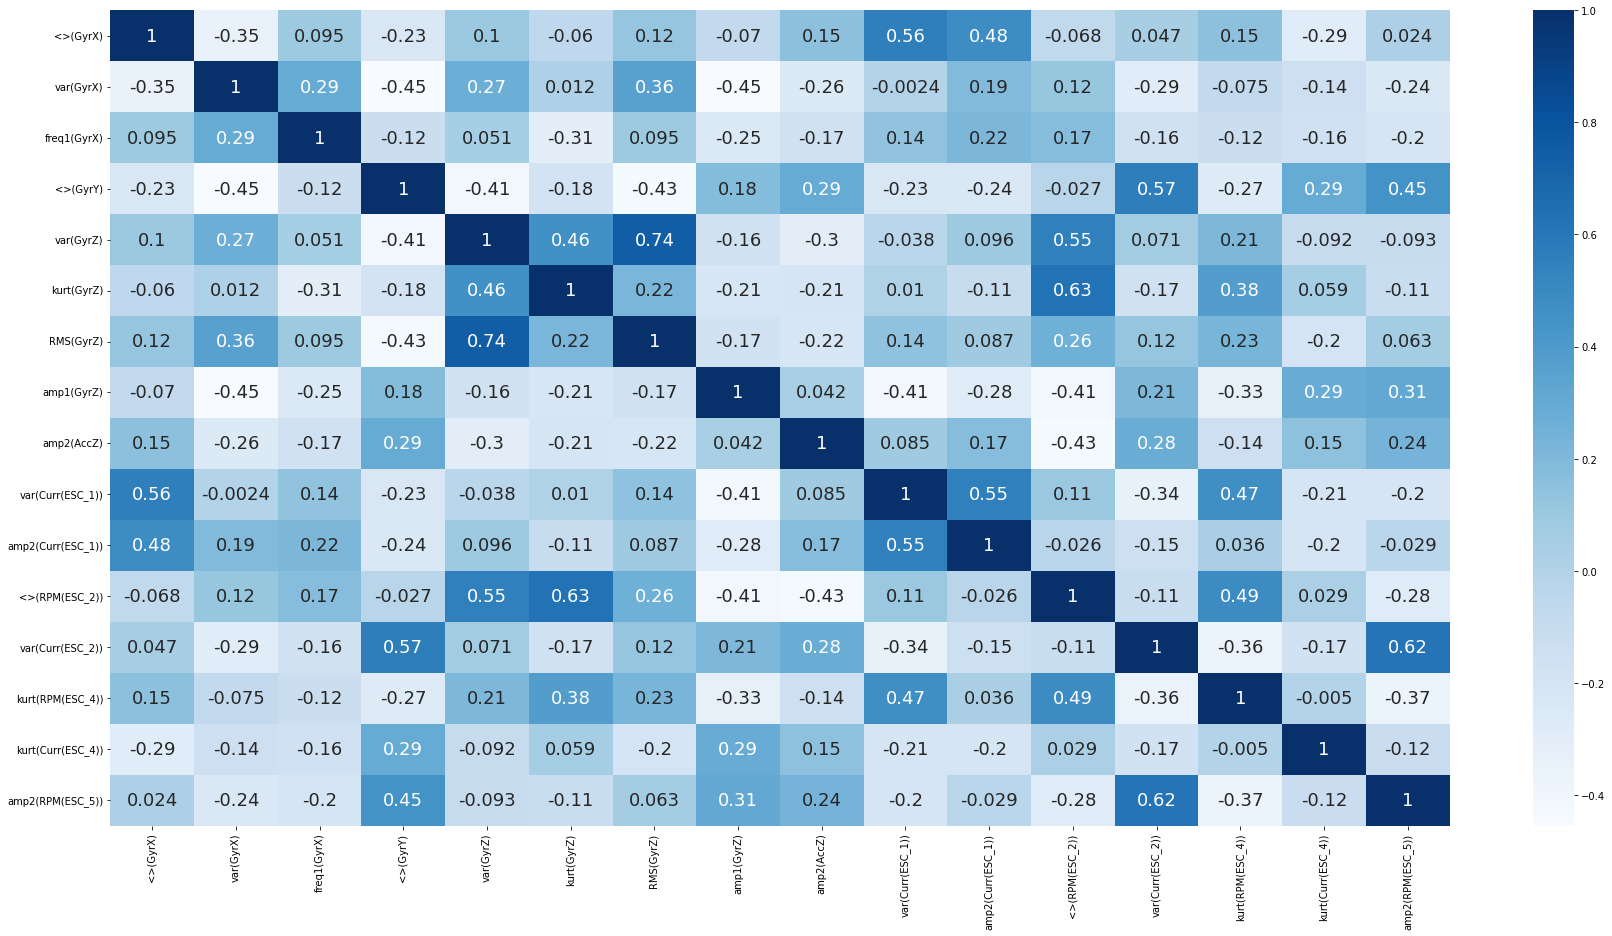

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 16)
(325, 16)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [23]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.68846154 0.71153846 0.66923077 0.69111969 0.71428571]
Accuracy: 0.7 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.48076923 0.50769231 0.50384615 0.4980695  0.5019305 ]
Accuracy: 0.54 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.72307692 0.53076923 0.7        0.48262548 0.71428571]
Accuracy: 0.49 	 ---> MLPClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.43846154 0.48076923 0.38461538 0.52509653 0.33204633]
Accuracy: 0.4 	 ---> SGDClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


### Matrici di confusione

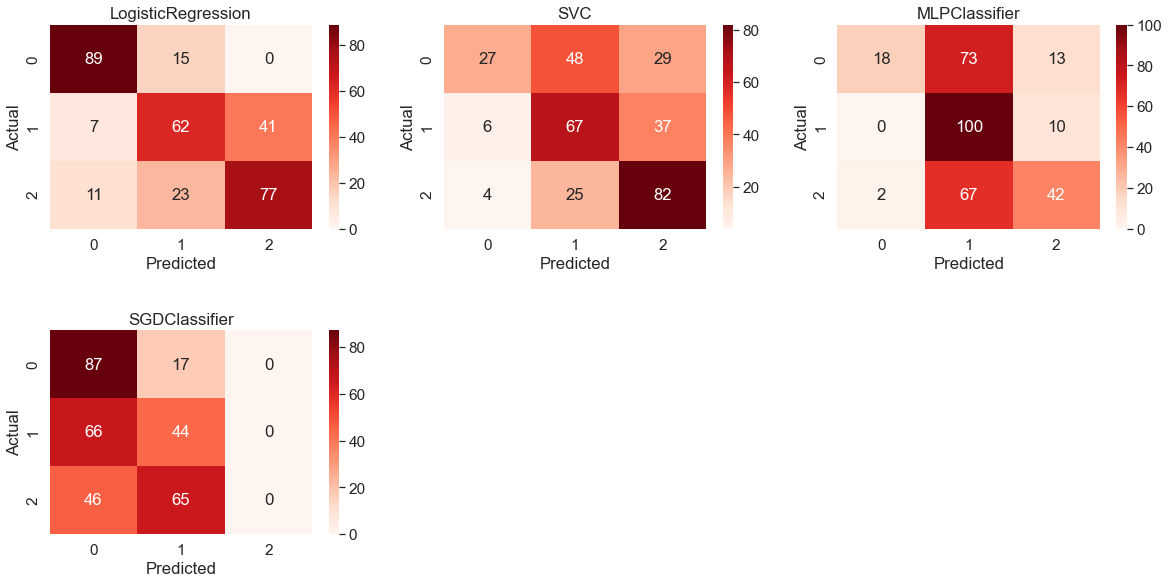

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [25]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       104
           1       0.62      0.56      0.59       110
           2       0.65      0.69      0.67       111

    accuracy                           0.70       325
   macro avg       0.70      0.70      0.70       325
weighted avg       0.70      0.70      0.70       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.26      0.38       104
           1       0.48      0.61      0.54       110
           2       0.55      0.74      0.63       111

    accuracy                           0.54       325
   macro avg       0.59      0.54      0.52       325
weighted avg       0.58      0.54      0.52       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.17      0.29       104
           1       0.42